In [54]:
import pandas as pd
import seaborn as sns
import mlflow
import matplotlib.pyplot as plt

# Load all runs and find the commit ID

In [ ]:
mlflow.set_tracking_uri("/novo/projects/departments/cdd/public/users/ehec/au24/mlruns")
runs_df = mlflow.search_runs(experiment_names=['ML-BP-Domino'],
                             filter_string=filter_string)
runs_df

In [21]:
list(runs_df.columns) # see all mlflow params/metrics

['run_id',
 'experiment_id',
 'status',
 'artifact_uri',
 'start_time',
 'end_time',
 'metrics.accuracy',
 'metrics.recall',
 'metrics.f_score',
 'metrics.ROCAUC',
 'metrics.matthews_corr_coef',
 'metrics.precision',
 'metrics.balanced_accuracy',
 'metrics.specificity',
 'metrics.mean_fit_time',
 'metrics.std_score_time',
 'metrics.std_fit_time',
 'metrics.mean_test_score',
 'metrics.rank_test_score',
 'metrics.std_test_score',
 'metrics.mean_score_time',
 'metrics.training_f1_score',
 'metrics.training_score',
 'metrics.training_precision_score',
 'metrics.training_roc_auc',
 'metrics.best_cv_score',
 'metrics.training_recall_score',
 'metrics.training_accuracy_score',
 'metrics.training_log_loss',
 'params.persistence.data_root_folder',
 'params.general.run_mode',
 'params.predictor.hparams.patience',
 'params.predictor.hparams.batch_size',
 'params.embedder.scalar_type',
 'params.predictor.hparams.kernel_size',
 'params.embedder.class_name',
 'params.embedder.buffer_scale_factor',
 

In [22]:
print(runs_df.iloc[0]['start_time']) # runs are sorted by when they were started by default
print(runs_df.iloc[0]['tags.mlflow.user']) # runs are sorted by when they were started by default
print(runs_df.iloc[0]['tags.mlflow.source.git.commit'])

2025-01-27 21:02:13.443000+00:00
ehec
4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3


# Load new runs

In [29]:
# Define the query for filtering the runs that we're interested in
filter_string = f"""
    tags.mlflow.user LIKE 'ehec' AND tags.mlflow.source.git.commit LIKE '4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3'
"""
runs_df = mlflow.search_runs(experiment_names=['ML-BP-Domino'],
                             filter_string=filter_string)
print(len(runs_df))
runs_df = runs_df.dropna(subset=["metrics.matthews_corr_coef"]) # GridSearchCV creates multiple runs for each model: we only need the one with the metrics 
runs_df = runs_df.reindex(sorted(runs_df.columns), axis=1)
print(len(runs_df))
runs_df

36
36


,artifact_uri,end_time,experiment_id,metrics.ROCAUC,metrics.accuracy,metrics.balanced_accuracy,metrics.f_score,metrics.matthews_corr_coef,metrics.precision,metrics.recall,...,params.predictor.model_name,params.predictor.model_type,run_id,start_time,status,tags.mlflow.runName,tags.mlflow.source.git.commit,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user
0,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:10:46.354000+00:00,365073593446001409,0.885141,0.787004,0.794181,0.735426,0.568746,0.666667,0.82,...,None,classification_binary,c72df1c9ab3c42d0ab09f2fb1e26c8bb,2025-01-27 21:02:13.443000+00:00,FINISHED,resilient-deer-398,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
1,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:15:05.185000+00:00,365073593446001409,0.904011,0.823105,0.798503,0.743455,0.610503,0.780220,0.71,...,None,classification_binary,f258e7b6a8f94a35844d99ab5e3b7e24,2025-01-27 21:02:07.690000+00:00,FINISHED,brawny-bass-762,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
2,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:08:18.128000+00:00,365073593446001409,0.894294,0.823105,0.811554,0.758621,0.619236,0.747573,0.77,...,None,classification_binary,0e7282138a2347c9b7f34b068d2357a9,2025-01-27 21:01:41.884000+00:00,FINISHED,bold-pug-611,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
3,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:04:16.337000+00:00,365073593446001409,0.864576,0.812274,0.776977,0.714286,0.582823,0.792683,0.65,...,None,classification_binary,c7ca1e996bca481c881ab2ac50e7d593,2025-01-27 20:55:30.711000+00:00,FINISHED,unequaled-shrimp-276,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
4,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:02:43.443000+00:00,365073593446001409,0.916215,0.826715,0.805678,0.752577,0.620142,0.776596,0.73,...,None,classification_binary,c25f6aebb39649f3aa14b030c6c24e49,2025-01-27 20:55:19.058000+00:00,FINISHED,grandiose-koi-454,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
5,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:02:27.093000+00:00,365073593446001409,0.896893,0.830325,0.795452,0.740331,0.623926,0.827160,0.67,...,None,classification_binary,efff873e87014b1ebcbc8aa1ee62cddb,2025-01-27 20:54:27.801000+00:00,FINISHED,blushing-stork-649,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
6,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:06:27.626000+00:00,365073593446001409,0.878983,0.805054,0.797429,0.740385,0.585794,0.712963,0.77,...,None,classification_binary,05a50f26fe464d49a330405c5615712c,2025-01-27 20:54:26.314000+00:00,FINISHED,sophisticated-hog-42,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
7,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:03:34.790000+00:00,365073593446001409,0.903503,0.841155,0.819153,0.770833,0.650931,0.804348,0.74,...,None,classification_binary,a07114a84e754e0ca42f47fb6ca40054,2025-01-27 20:54:23.971000+00:00,FINISHED,puzzled-grub-514,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
8,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:00:06.691000+00:00,365073593446001409,0.895311,0.823105,0.813729,0.760976,0.621172,0.742857,0.78,...,None,classification_binary,99b135b45bb04c9287b3aaa1821a6549,2025-01-27 20:54:21.149000+00:00,FINISHED,brawny-skink-764,4fba7f5cc989aab0f15d7fb7a65fdab6fe2259d3,/novo/projects/departments/cdd/public/users/eh...,LOCAL,ehec
9,file:///novo/projects/departments/cdd/public/u...,2025-01-27 21:00:30.638000+00:00,365073593446001409,0.883051,0.815884,0.78197

# Plot results

In [72]:
runs_df['params.dataset.data_name'].unique()

array(['sbxw_fibrillation_peptide_waltzdb-train-val_serrano-test'],
      dtype=object)

In [55]:
filt_runs_df = runs_df[['params.dataset.data_name',
         'params.predictor.hparams.plain_LA',
         'params.predictor.hparams.kernel_size',
         'params.predictor.hparams.conv1d_downsizing_factor',
         'params.predictor.hparams.linear_post_concat',
         'metrics.ROCAUC']]
filt_runs_df

,params.dataset.data_name,params.predictor.hparams.plain_LA,params.predictor.hparams.kernel_size,params.predictor.hparams.conv1d_downsizing_factor,params.predictor.hparams.linear_post_concat,metrics.ROCAUC
0,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,3,320,False,0.885141
1,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,3,320,False,0.904011
2,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,5,160,False,0.894294
3,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,7,80,False,0.864576
4,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,5,160,False,0.916215
5,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,3,80,False,0.896893
6,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,5,320,False,0.878983
7,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,7,320,False,0.903503
8,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,7,160,False,0.895311
9,sbxw_fibrillation_peptide_waltzdb-train-val_se...,True,3,160,False,0.883051


In [62]:
list(runs_df.columns)

['artifact_uri',
 'end_time',
 'experiment_id',
 'metrics.ROCAUC',
 'metrics.accuracy',
 'metrics.balanced_accuracy',
 'metrics.f_score',
 'metrics.matthews_corr_coef',
 'metrics.precision',
 'metrics.recall',
 'metrics.specificity',
 'params.dataset.add_data_columns',
 'params.dataset.data_columns_dimred',
 'params.dataset.data_columns_standard',
 'params.dataset.data_name',
 'params.dataset.data_scaler',
 'params.dataset.data_split.test',
 'params.dataset.data_split.train',
 'params.dataset.data_split.val',
 'params.dataset.rbf_encoder',
 'params.dataset.rbf_n_kernels',
 'params.dataset.task',
 'params.dataset.use_predefined_split',
 'params.dimred.class_name',
 'params.dimred.fraction_variance_explained',
 'params.dimred.transform_name',
 'params.embedder.buffer_scale_factor',
 'params.embedder.chain_break',
 'params.embedder.class_name',
 'params.embedder.hparams',
 'params.embedder.max_batch_size',
 'params.embedder.mean_pool',
 'params.embedder.model_name',
 'params.embedder.mode

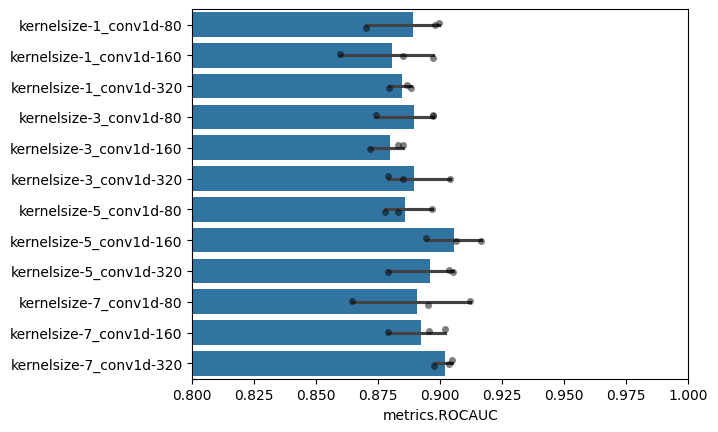

In [59]:
columns = [
         'params.predictor.hparams.kernel_size',
         'params.predictor.hparams.conv1d_downsizing_factor',
         'metrics.ROCAUC']
runs_df['params.predictor.hparams.conv1d_downsizing_factor'] = runs_df['params.predictor.hparams.conv1d_downsizing_factor'].astype(int)
filt_runs_df = runs_df[columns].sort_values(by=columns)
filt_runs_df['params.predictor.hparams.conv1d_downsizing_factor'] = filt_runs_df['params.predictor.hparams.conv1d_downsizing_factor'].astype(str)
filt_runs_df['name'] = 'kernelsize-'+filt_runs_df['params.predictor.hparams.kernel_size'] + '_conv1d-' + filt_runs_df['params.predictor.hparams.conv1d_downsizing_factor']
ax = sns.barplot(data=filt_runs_df,x='metrics.ROCAUC',y='name')
ax = sns.stripplot(data=filt_runs_df,x='metrics.ROCAUC',y='name',color='black',alpha=0.5)
ax.set_xlim(0.8,1.0)
ax.set_ylabel('')
plt.savefig('250127_hparam_experiment.png',dpi=100,bbox_inches='tight')

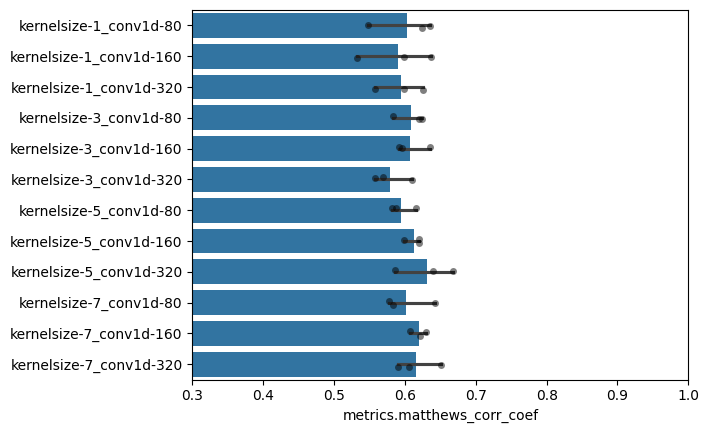

In [67]:
columns = [
         'params.predictor.hparams.kernel_size',
         'params.predictor.hparams.conv1d_downsizing_factor',
         'metrics.matthews_corr_coef']
runs_df['params.predictor.hparams.conv1d_downsizing_factor'] = runs_df['params.predictor.hparams.conv1d_downsizing_factor'].astype(int)
filt_runs_df = runs_df[columns].sort_values(by=columns)
filt_runs_df['params.predictor.hparams.conv1d_downsizing_factor'] = filt_runs_df['params.predictor.hparams.conv1d_downsizing_factor'].astype(str)
filt_runs_df['name'] = 'kernelsize-'+filt_runs_df['params.predictor.hparams.kernel_size'] + '_conv1d-' + filt_runs_df['params.predictor.hparams.conv1d_downsizing_factor']
ax = sns.barplot(data=filt_runs_df,x='metrics.matthews_corr_coef',y='name')
ax = sns.stripplot(data=filt_runs_df,x='metrics.matthews_corr_coef',y='name',color='black',alpha=0.5)
ax.set_xlim(0.3,1.0)
ax.set_ylabel('')
plt.savefig('250127_hparam_experiment_mcc.png',dpi=100,bbox_inches='tight')